In [4092]:
# Nicolas Rubert
# 172007365
# Nar126

# Import Required Packages
import pandas as pd
import numpy as np
# Plotting Libaries
from matplotlib import pyplot as plt
import seaborn as sb
# ML libarary
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4093]:
# Read the Dataset
loan_df = pd.read_csv('LoanDataset.csv')

# Preprocessing

In [4094]:
# Print the dataframe's shape
print(loan_df.shape)

(614, 13)


In [4095]:
# Printing the first 20 entries in the dataframe
loan_df.head(20)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4096]:
# Find all the null values in the dataset
loan_df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4097]:
# Get the number of males/females in the dataset
print(loan_df['Gender'].value_counts()['Male'])
print(loan_df['Gender'].value_counts()['Female'])

# Convert Null values in Gender to Females (Done to make the amount of Males vs Females closer)
loan_df["Gender"].fillna("Female", inplace = True)

489
112


In [4098]:
# Get the number of Married Vs Single in the dataset
print(loan_df['Married'].value_counts()['Yes'])
print(loan_df['Married'].value_counts()['No'])

# Convert Null values in Married to No (Done to make the amount of Yes vs No closer)
loan_df['Married'].fillna('No', inplace = True)

398
213


In [4099]:
# Convert Null values in Dependents to 0
loan_df['Dependents'].fillna('0', inplace = True)

In [4100]:
# Get the number of Self Employed vs Employees
print(loan_df['Self_Employed'].value_counts()['Yes'])
print(loan_df['Self_Employed'].value_counts()['No'])

# According to labor statics from 2015 (https://www.bls.gov/spotlight/2016/self-employment-in-the-united-states/pdf/self-employment-in-the-united-states.pdf)
# Only 10.9% of Americans in the workforce are Self Employed
# Make Null into No
loan_df['Self_Employed'].fillna('No', inplace = True)

82
500


In [4101]:
# Replace null values with the mean
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean())
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mean())


In [4102]:
# Print the number of null values after preprocessing
loan_df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualized


<h2>Male vs Female Applicants</h2>


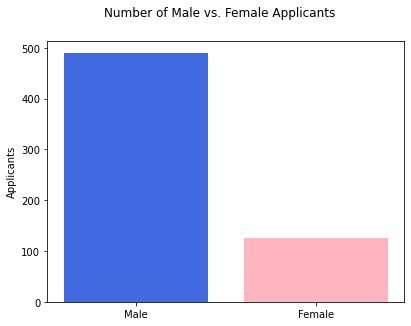

In [4103]:
# Male vs Female Applicants Plot
names = ['Male', 'Female']
values = [
    loan_df['Gender'].value_counts()['Male'],
    loan_df['Gender'].value_counts()['Female']
]

plt.figure(figsize=(6.4,4.8))
plt.bar(names, values, color=('royalblue','lightpink'))
plt.ylabel('Applicants')
plt.suptitle('Number of Male vs. Female Applicants')
plt.show()


<h2>Married vs. Single Applicants</h2>


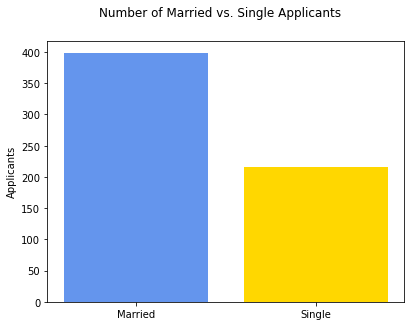

In [4104]:
# Married vs Single Applicants Plot
names = ['Married', 'Single']
values = [
    loan_df['Married'].value_counts()['Yes'],
    loan_df['Married'].value_counts()['No']
]

plt.figure(figsize=(6.4,4.8))
plt.bar(names, values, color=('cornflowerblue','gold'))
plt.ylabel('Applicants')
plt.suptitle('Number of Married vs. Single Applicants')
plt.show()

<h2>Number of Dependents</h2>



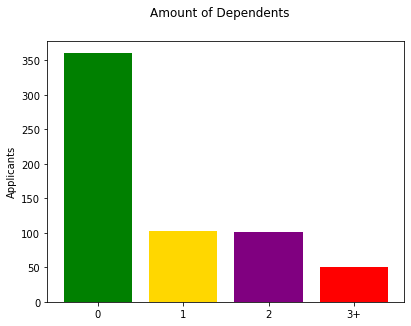

In [4105]:
# Rem
# Property Type
names = ['0', '1', '2', '3+']
values = [
    loan_df['Dependents'].value_counts()['0'],
    loan_df['Dependents'].value_counts()['1'],
    loan_df['Dependents'].value_counts()['2'],
    loan_df['Dependents'].value_counts()['3+'],
]

plt.figure(figsize=(6.4,4.8))
plt.bar(names, values, color=('green','gold','purple','red'))
plt.ylabel('Applicants')
plt.suptitle('Amount of Dependents')
plt.show()

<h2>Self Employed vs Employee </h2>

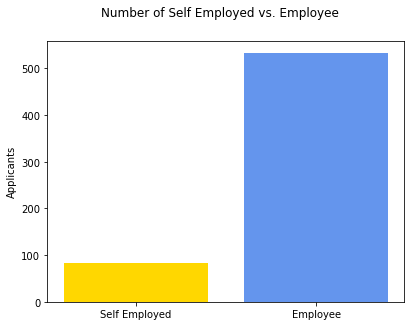

In [4106]:
# Self Employed vs Employee Applicants Plot
names = ['Self Employed', 'Employee']
values = [loan_df['Self_Employed'].value_counts()['Yes'], loan_df['Self_Employed'].value_counts()['No']]

plt.figure(figsize=(6.4,4.8))
plt.bar(names, values, color=('gold','cornflowerblue'))
plt.ylabel('Applicants')
plt.suptitle('Number of Self Employed vs. Employee')
plt.show()

<h2>Average Applicant Income</h2>


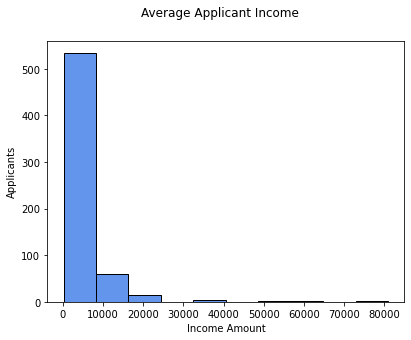

In [4107]:
# Average
plt.figure(figsize=(6.4,4.8))
plt.hist(loan_df['ApplicantIncome'], color='cornflowerblue',edgecolor='black')
plt.ylabel('Applicants')
plt.xlabel('Income Amount')
plt.suptitle('Average Applicant Income')
plt.show()

<h2>Average Loan Amount</h2>


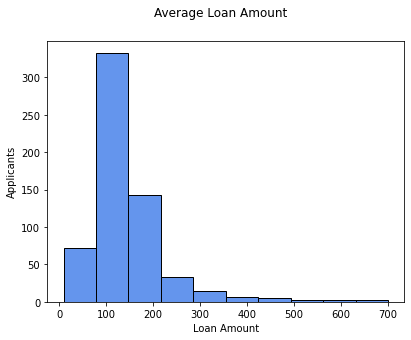

In [4108]:
# Average
plt.figure(figsize=(6.4,4.8))
plt.hist(loan_df['LoanAmount'],color='cornflowerblue', edgecolor='black')
plt.ylabel('Applicants')
plt.xlabel('Loan Amount')
plt.suptitle('Average Loan Amount')
plt.show()

<h2>Average Loan Term</h2>


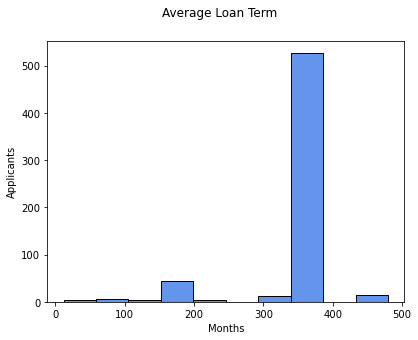

In [4109]:
#Average
plt.figure(figsize=(6.4,4.8))
plt.hist(loan_df['Loan_Amount_Term'], color='cornflowerblue' ,edgecolor='black')
plt.ylabel('Applicants')
plt.xlabel('Months')
plt.suptitle('Average Loan Term')
plt.show()

<h2>Previous Credit History vs No Credit History

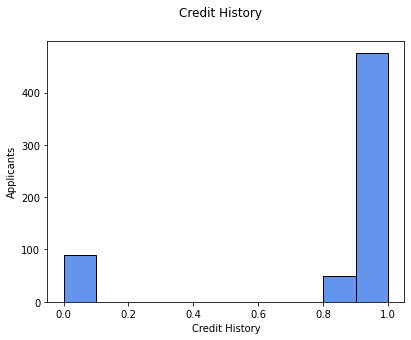

In [4110]:
###### Need Work ########
plt.figure(figsize=(6.4,4.8))
plt.hist(loan_df['Credit_History'], color='cornflowerblue' ,edgecolor='black')
plt.ylabel('Applicants')
plt.xlabel('Credit History')
plt.suptitle('Credit History')
plt.show()


<h2>Property Area</h2>


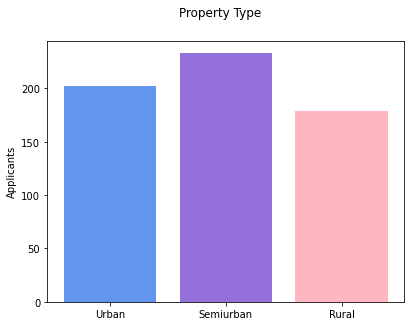

In [4111]:
# Property Type
names = ['Urban', 'Semiurban', 'Rural']
values = [
    loan_df['Property_Area'].value_counts()['Urban'],
    loan_df['Property_Area'].value_counts()['Semiurban'],
    loan_df['Property_Area'].value_counts()['Rural'],
]

plt.figure(figsize=(6.4,4.8))
plt.bar(names, values, color=('cornflowerblue','mediumpurple','lightpink'))
plt.ylabel('Applicants')
plt.suptitle('Property Type')
plt.show()

<h2> Loan Status </h2>


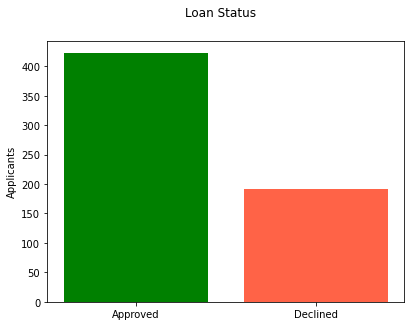

In [4112]:
# Loan Status
names = ['Approved', 'Declined']
values = [
    loan_df['Loan_Status'].value_counts()['Y'],
    loan_df['Loan_Status'].value_counts()['N'],
]

plt.figure(figsize=(6.4,4.8))
plt.bar(names, values, color=('green','tomato'))
plt.ylabel('Applicants')
plt.suptitle('Loan Status')
plt.show()

# Feature Selection and Engineering

<h2> Binary Encoding </h2>

In [4113]:
# Convert Gender Values into Binary
loan_df.replace(to_replace='Male', value=1, inplace=True)
loan_df.replace(to_replace='Female', value=0, inplace=True)

In [4114]:
# Convert Education Values into Binary
loan_df.replace(to_replace='Graduate', value=1, inplace=True)
loan_df.replace(to_replace='Not Graduate', value=0, inplace=True)

In [4115]:
# Convert Dependents Values into Binary
loan_df['Dependents'].replace(to_replace='0', value=0, inplace=True)
loan_df['Dependents'].replace(to_replace='1', value=1, inplace=True)
loan_df['Dependents'].replace(to_replace='2', value=1, inplace=True)
loan_df['Dependents'].replace(to_replace='3+', value=1, inplace=True)

In [4116]:
# Convert Yes/No Values to Binary
loan_df.replace(to_replace='Yes', value=1, inplace=True)
loan_df.replace(to_replace='No', value=0, inplace=True)
# Convert Y/N Values to Binary
loan_df.replace(to_replace='Y', value=1, inplace=True)
loan_df.replace(to_replace='N', value=0, inplace=True)

<h2> Creation of New Variable </h2>

In [4117]:
# Creation of a new Category
# Total Income = Applicant_Income + CoApplicant_Income
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

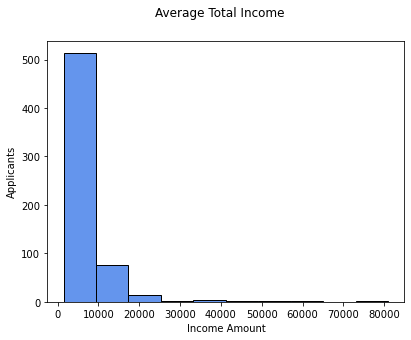

In [4118]:
# Total Income Graph
plt.figure(figsize=(6.4,4.8))
plt.hist(loan_df['Total_Income'], color='cornflowerblue',edgecolor='black')
plt.ylabel('Applicants')
plt.xlabel('Income Amount')
plt.suptitle('Average Total Income')
plt.show()


In [4119]:
# Log Transformation of the variables
loan_df['ApplicantIncomeLog'] = np.log(loan_df['ApplicantIncome']+1)
loan_df['CoapplicantIncomeLog'] = np.log(loan_df['CoapplicantIncome']+1)
loan_df['LoanAmountLog'] = np.log(loan_df['LoanAmount']+1)
loan_df['Loan_Amount_Term_Log'] = np.log(loan_df['Loan_Amount_Term']+1)
loan_df['Total_Income_Log'] = np.log(loan_df['Total_Income']+1)

<h2>Log Transformation Plots </h2>

/usr/local/anaconda3/envs/ML_F__NR/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

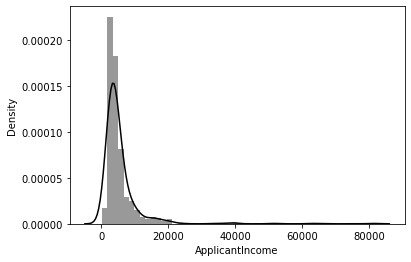

In [4120]:
# Applicant Income Plot
sb.distplot(loan_df["ApplicantIncome"], color='black')

/usr/local/anaconda3/envs/ML_F__NR/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

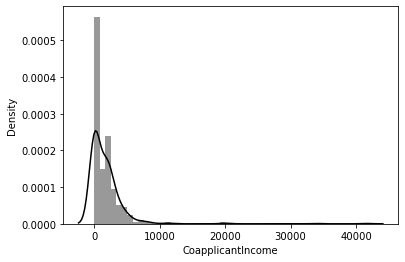

In [4121]:
# Coapplicant Income Plot
sb.distplot(loan_df["CoapplicantIncome"], color='black')

/usr/local/anaconda3/envs/ML_F__NR/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

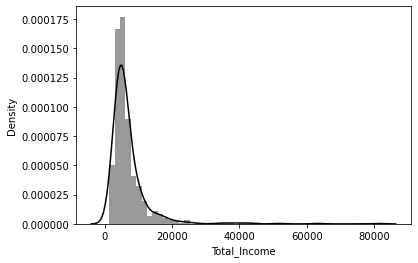

In [4122]:
# Coapplicant Income Plot
sb.distplot(loan_df["Total_Income"], color='black')

/usr/local/anaconda3/envs/ML_F__NR/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

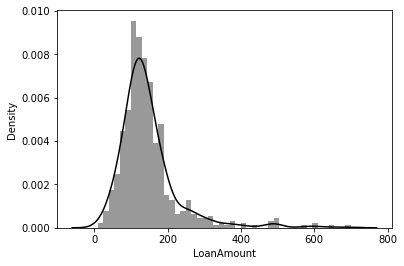

In [4123]:
# Loan Amount Plot
sb.distplot(loan_df["LoanAmount"], color='black')

<h2>Dropping Variables </h2>

In [4124]:
# Drop Redundant Columns
loan_df = loan_df.drop(columns=
                       ['ApplicantIncome','CoapplicantIncome',
                        'LoanAmount','Loan_Amount_Term',
                        'Total_Income', 'Loan_ID','CoapplicantIncomeLog'])

In [4125]:
# Print the first 20 entries after
loan_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,1,0,1.0,Urban,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,1,0,1.0,Rural,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,1,1,1.0,Urban,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,0,0,1.0,Urban,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,1,0,1.0,Urban,1,8.699681,4.955827,5.888878,8.699681
5,1,1,1,1,1,1.0,Urban,1,8.597482,5.590987,5.888878,9.170976
6,1,1,0,0,0,1.0,Urban,1,7.755339,4.564348,5.888878,8.255828
7,1,1,1,1,0,0.0,Semiurban,0,8.018625,5.068904,5.888878,8.619930
8,1,1,1,1,0,1.0,Urban,1,8.295798,5.129899,5.888878,8.618485
9,1,1,1,1,0,1.0,Semiurban,0,9.460476,5.857933,5.888878,10.077861


# Correlation Matrix

<h2>Correlations in the Data </h2>


In [4126]:
# Print Coorelation
loan_df.corr()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
Gender,1.000000,0.339026,0.137237,-0.061497,-0.027421,0.025103,0.025407,0.060373,0.107791,-0.054638,0.126910
Married,0.339026,1.000000,0.355644,-0.017671,0.008491,0.001212,0.084281,0.016583,0.175951,-0.069973,0.150391
Dependents,0.137237,0.355644,1.000000,-0.036563,0.088254,-0.021128,0.003044,0.114693,0.147710,-0.090064,0.102174
Education,-0.061497,-0.017671,-0.036563,1.000000,0.010383,0.077936,0.085884,0.181735,0.144147,0.065201,0.204861
Self_Employed,-0.027421,0.008491,0.088254,0.010383,1.000000,-0.002260,-0.003700,0.189847,0.109890,-0.026115,0.176709
Credit_History,0.025103,0.001212,-0.021128,0.077936,-0.002260,1.000000,0.540483,0.019183,-0.024909,-0.007773,0.019154
Loan_Status,0.025407,0.084281,0.003044,0.085884,-0.003700,0.540483,1.000000,0.010959,-0.042131,-0.007232,0.007232
ApplicantIncomeLog,0.060373,0.016583,0.114693,0.181735,0.189847,0.019183,0.010959,1.000000,0.492560,-0.014723,0.740402
LoanAmountLog,0.107791,0.175951,0.147710,0.144147,0.109890,-0.024909,-0.042131,0.492560,1.000000,0.084301,0.658957
Loan_Amount_Term_Log,-0.054638,-0.069973,-0.090064,0.065201,-0.026115,-0.007773,-0.007232,-0.014723,0.084301,1.000000,-0.029705


<h2>Correlation Matrix</h2>


In [4127]:
# Correlation Matrix
corr = loan_df.corr()
corr.style.background_gradient(cmap='Pastel1')


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
Gender,1.000000,0.339026,0.137237,-0.061497,-0.027421,0.025103,0.025407,0.060373,0.107791,-0.054638,0.126910
Married,0.339026,1.000000,0.355644,-0.017671,0.008491,0.001212,0.084281,0.016583,0.175951,-0.069973,0.150391
Dependents,0.137237,0.355644,1.000000,-0.036563,0.088254,-0.021128,0.003044,0.114693,0.147710,-0.090064,0.102174
Education,-0.061497,-0.017671,-0.036563,1.000000,0.010383,0.077936,0.085884,0.181735,0.144147,0.065201,0.204861
Self_Employed,-0.027421,0.008491,0.088254,0.010383,1.000000,-0.002260,-0.003700,0.189847,0.109890,-0.026115,0.176709
Credit_History,0.025103,0.001212,-0.021128,0.077936,-0.002260,1.000000,0.540483,0.019183,-0.024909,-0.007773,0.019154
Loan_Status,0.025407,0.084281,0.003044,0.085884,-0.003700,0.540483,1.000000,0.010959,-0.042131,-0.007232,0.007232
ApplicantIncomeLog,0.060373,0.016583,0.114693,0.181735,0.189847,0.019183,0.010959,1.000000,0.492560,-0.014723,0.740402
LoanAmountLog,0.107791,0.175951,0.147710,0.144147,0.109890,-0.024909,-0.042131,0.492560,1.000000,0.084301,0.658957
Loan_Amount_Term_Log,-0.054638,-0.069973,-0.090064,0.065201,-0.026115,-0.007773,-0.007232,-0.014723,0.084301,1.000000,-0.029705


# Classification Algorithms

In [4128]:
# Encode the labels
columns = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
labelEncoded = LabelEncoder()
for col in columns:
    loan_df[col] = labelEncoded.fit_transform(loan_df[col])

loan_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,1,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,1,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,1,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,0,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,1,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681
5,1,1,1,1,1,1.0,2,1,8.597482,5.590987,5.888878,9.170976
6,1,1,0,0,0,1.0,2,1,7.755339,4.564348,5.888878,8.255828
7,1,1,1,1,0,0.0,1,0,8.018625,5.068904,5.888878,8.619930
8,1,1,1,1,0,1.0,2,1,8.295798,5.129899,5.888878,8.618485
9,1,1,1,1,0,1.0,1,0,9.460476,5.857933,5.888878,10.077861


In [4129]:
# specify input and output attributes
X = loan_df.drop(columns=['Loan_Status'], axis=1)
y = loan_df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

<h2>Training Models</h2>

<h3>Training Accuracy</h3>

Logistic Regression

In [4130]:
# RUn the model
model = LogisticRegression(random_state=0).fit(x_train, y_train)
print("Accuracy in Training is", model.score(x_train, y_train)*100)
score = cross_val_score(model, x_train, y_train, cv=4)
print("Cross validation is",np.mean(score)*100)

Accuracy in Training is 79.34782608695652
Cross validation is 76.63043478260869


K-Nearest Neighbor

In [4131]:
# Run the model
Kmodel = KNeighborsClassifier().fit(x_train, y_train)
print("Accuracy in Training is", Kmodel.score(x_train, y_train)*100)
score = cross_val_score(Kmodel, x_train, y_train, cv=4)
print("Cross validation is",np.mean(score)*100)

Accuracy in Training is 82.06521739130434
Cross validation is 70.1086956521739


Decision Tree Classifier

In [4132]:
# Run the model
Dmodel = DecisionTreeClassifier().fit(x_train, y_train)
print("Accuracy in Training is", Dmodel.score(x_train, y_train)*100)
score = cross_val_score(Dmodel, x_train, y_train, cv=4)
print("Cross validation is",np.mean(score)*100)

Accuracy in Training is 100.0
Cross validation is 72.82608695652173


<h3>Testing Accuracy</h3>

Logistic Regression

In [4133]:
# Run the model
model = LogisticRegression(random_state=0).fit(x_test, y_test)
print("Accuracy in Training is", model.score(x_test, y_test)*100)
score = cross_val_score(model, x_test, y_test, cv=4)
print("Cross validation is",np.mean(score)*100)

Accuracy in Training is 82.09302325581396
Cross validation is 81.62859120803047


K-Nearest Neighbor

In [4134]:
# Run the model
Kmodel = KNeighborsClassifier().fit(x_test, y_test)
print("Accuracy in Training is", Kmodel.score(x_test, y_test)*100)
score = cross_val_score(Kmodel, x_test, y_test, cv=4)
print("Cross validation is",np.mean(score)*100)

Accuracy in Training is 81.86046511627907
Cross validation is 76.74800969193493


Decision Tree Classifier

In [4135]:
# Run the model
Dmodel = DecisionTreeClassifier().fit(x_test, y_test)
print("Accuracy in Training is", Dmodel.score(x_test, y_test)*100)
score = cross_val_score(Dmodel, x_test, y_test, cv=4)
print("Cross validation is",np.mean(score)*100)


Accuracy in Training is 100.0
Cross validation is 69.99394254067151
